In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.datasets import mnist

In [56]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [57]:
x_train.shape , y_train.shape ,  x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

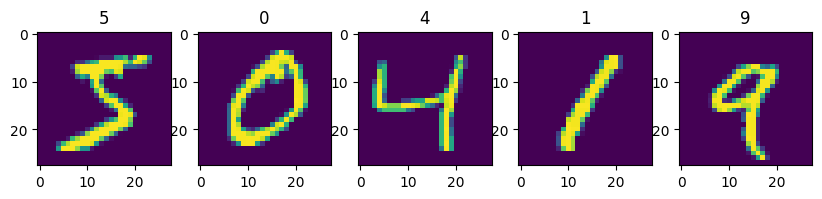

In [58]:
plt.figure(figsize=(10, 2))
for i in range(5):
    img = x_train[i].reshape(28, 28, 1).astype('uint8')
    label = y_train[i]
    plt.subplot(1, 5, i+1)
    plt.title(label)
    plt.imshow(img)

In [59]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [75]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [62]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28 , 1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [63]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9459 - loss: 0.3083 - val_accuracy: 0.9799 - val_loss: 0.0670
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 40ms/step - accuracy: 0.9797 - loss: 0.0668 - val_accuracy: 0.9869 - val_loss: 0.0449


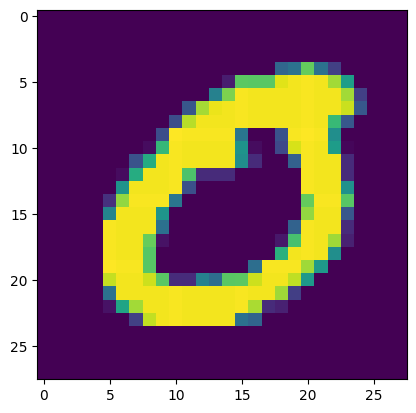

In [66]:
idx = random.randint(0, len(x_test)-1)
plt.imshow(x_test[idx])

In [69]:
pred = model.predict(x_test[idx].reshape(-1 , 28, 28 , 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


In [70]:
pred

array([[9.9993873e-01, 1.2469378e-09, 5.3379008e-05, 1.4446815e-08,
        7.6951401e-06, 4.1258090e-09, 2.4221842e-08, 1.6218619e-09,
        1.0969196e-08, 5.7120392e-08]], dtype=float32)

In [72]:
predicted_digit = np.argmax(pred)
predicted_digit

np.int64(0)

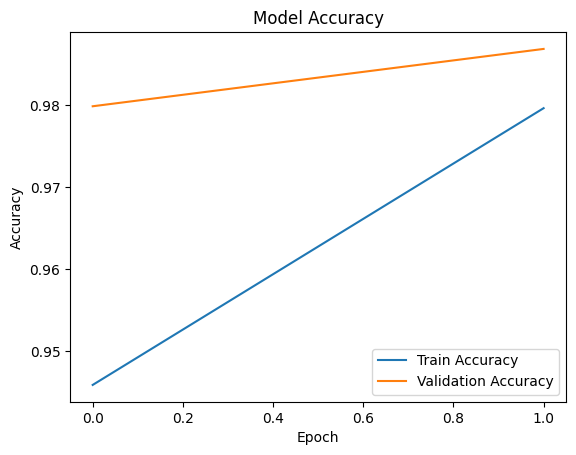

In [73]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

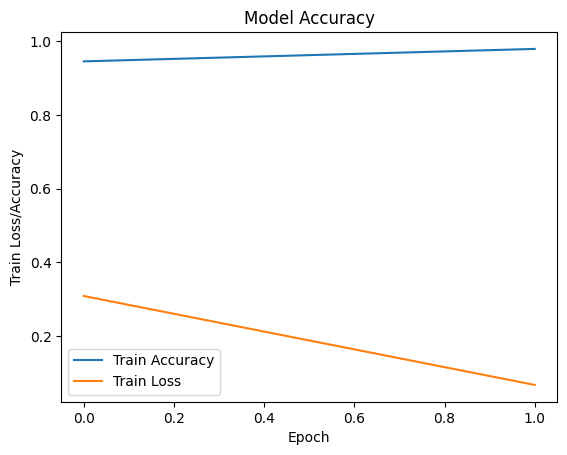

In [74]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Accuracy')
plt.ylabel('Train Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()